In [2]:
# External dependencies
import numpy as np
from matplotlib import image, pyplot as plt

In [110]:
# Constants
PATH: str = r"C:\Users\marcu\OneDrive\Pictures\pug.jpg"
VARIANCE_RATIO_FRONTIER: np.ndarray = np.arange(start=0.95, stop=1.0, step=0.05/9)[:-1]

In [32]:
# Get the data matrix representation of the image
pug_rgb: np.ndarray = image.imread(PATH)
pug_rgb, pug_rgb.shape

(array([[[241, 241, 241],
         [245, 245, 245],
         [247, 247, 247],
         ...,
         [248, 248, 248],
         [246, 246, 246],
         [245, 245, 245]],
 
        [[241, 241, 241],
         [245, 245, 245],
         [248, 248, 248],
         ...,
         [249, 249, 249],
         [248, 248, 248],
         [247, 247, 247]],
 
        [[240, 240, 240],
         [244, 244, 244],
         [246, 246, 246],
         ...,
         [249, 249, 249],
         [249, 249, 249],
         [250, 250, 250]],
 
        ...,
 
        [[210, 210, 210],
         [218, 218, 218],
         [205, 205, 205],
         ...,
         [150, 150, 150],
         [151, 151, 151],
         [152, 152, 152]],
 
        [[208, 208, 208],
         [216, 216, 216],
         [205, 205, 205],
         ...,
         [153, 153, 153],
         [155, 155, 155],
         [156, 156, 156]],
 
        [[206, 206, 206],
         [213, 213, 213],
         [205, 205, 205],
         ...,
         [155, 155, 155],
  

In [36]:
# Convert the image to greyscale by eliminating the 3rd dimension
pug_greyscale: np.ndarray = pug_rgb.mean(axis=-1)
pug_greyscale, pug_greyscale.shape

(array([[241., 245., 247., ..., 248., 246., 245.],
        [241., 245., 248., ..., 249., 248., 247.],
        [240., 244., 246., ..., 249., 249., 250.],
        ...,
        [210., 218., 205., ..., 150., 151., 152.],
        [208., 216., 205., ..., 153., 155., 156.],
        [206., 213., 205., ..., 155., 159., 161.]]),
 (1867, 1400))

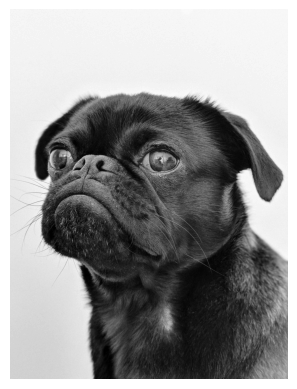

In [37]:
plt.imshow(pug_greyscale, cmap="grey")
plt.axis("off")
plt.show()

In [62]:
# Execute SVD to determine the key factors of variance
U, S, V_T = np.linalg.svd(a=pug_greyscale, full_matrices=False)
S: np.ndarray = np.diag(S)

np.allclose(a=pug_greyscale, b=U @ S @ V_T)

U.shape, S.shape, V_T.shape

((1867, 1400), (1400, 1400), (1400, 1400))

In [90]:
def calculate_total_variance(S: np.ndarray) -> float:
    return np.trace(S @ S)

def calculate_principle_component_variances(S: np.ndarray) -> float:
    return np.diag(S @ S)


def calculate_variance_ratios(S: np.ndarray) -> np.ndarray:
    return calculate_principle_component_variances(S=S) / calculate_total_variance(S=S)


def calculate_variance_ratio_number_of_principle_components(S: np.ndarray, variance_ratio: float) -> int:
    return np.where(calculate_variance_ratios(S=S).cumsum() > variance_ratio)[0][0] + 1

def calculate_variance_ratio_svd_approximation(U: np.ndarray, S: np.ndarray, V_T: np.ndarray, variance_ratio: float) -> np.ndarray:

    k: int = calculate_variance_ratio_number_of_principle_components(S=S, variance_ratio=variance_ratio)

    return U[:, :k] @ S[:k, :k] @ V_T[:k, :]


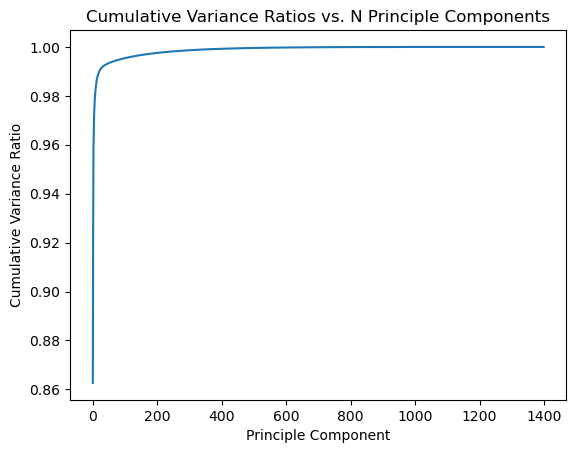

In [84]:
plt.plot(calculate_variance_ratios(S=S).cumsum())
plt.xlabel("Principle Component")
plt.ylabel("Cumulative Variance Ratio")
plt.title("Cumulative Variance Ratios vs. N Principle Components")
plt.show()

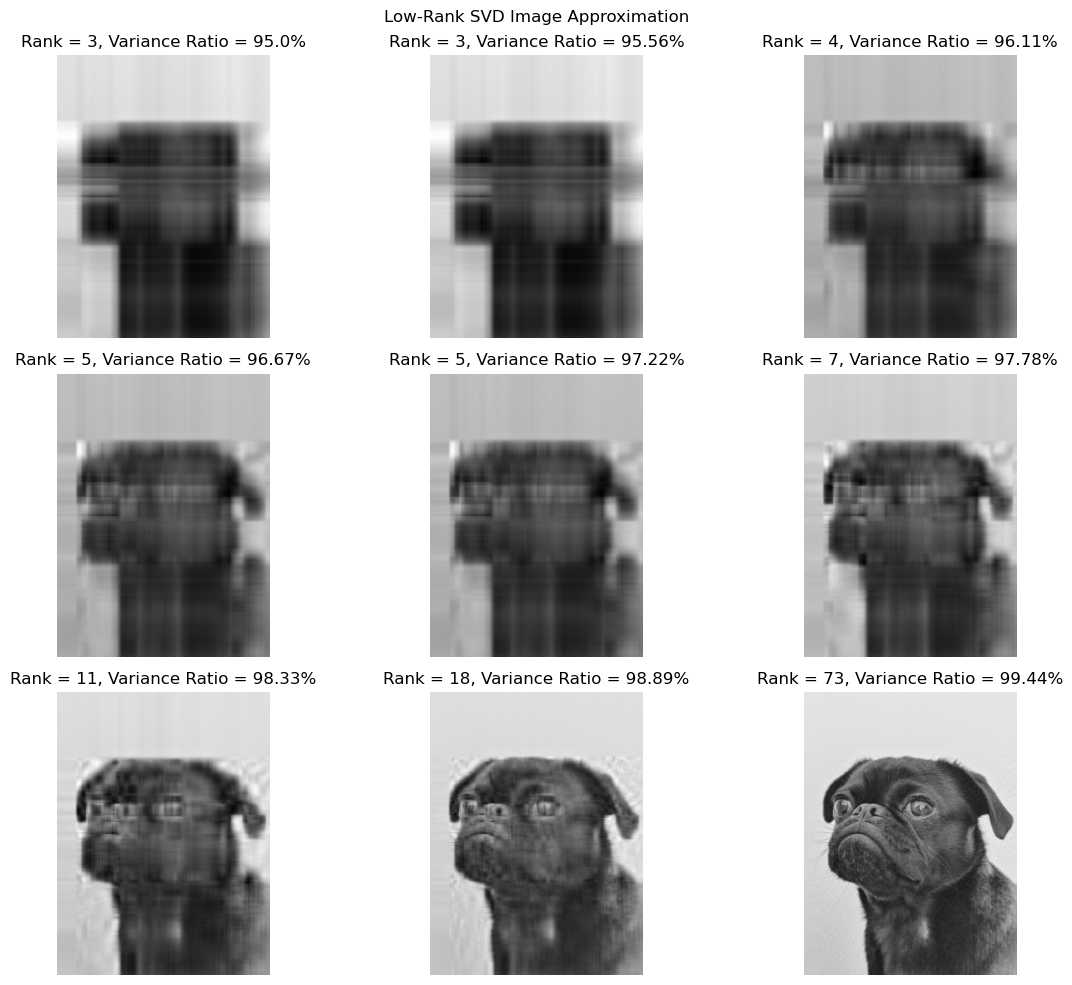

In [120]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12.5, 10))


for i, variance_ratio in enumerate(VARIANCE_RATIO_FRONTIER):

    # Calculate the rank / number of principle components required to explain variance ratio % of variance
    k_principle_components: int = calculate_variance_ratio_number_of_principle_components(S=S, variance_ratio=variance_ratio)

    # Execute a low rank approximation of the image via SVD - determine the rank by the explained variance ratio  
    low_rank_dog_approximation: np.ndarray = calculate_variance_ratio_svd_approximation(U=U, S=S, V_T=V_T, variance_ratio=variance_ratio)
    
    # Determine the row and column in the 3x3 grid
    row = i // 3
    col = i % 3

    # Plot
    ax[row, col].imshow(X=low_rank_dog_approximation, cmap="grey")
    ax[row, col].axis("off")
    ax[row, col].set_title(f"Rank = {k_principle_components}, Variance Ratio = {(variance_ratio * 100).round(2)}%")

plt.suptitle("Low-Rank SVD Image Approximation")
plt.tight_layout()
plt.show()